# 1er TP de sistemas inteligentes

Nombre:

Este trabajo práctico se aprueba completando más del 70% del mismo. Una vez completado el notebook y reenvielo al email 2329034@ucc.edu.ar. Importante: Asegurese que su correo haya llegado.

### Entender el problema

l hundimiento del Titanic es uno de los naufragios más infames de la historia. El 15 de abril de 1912, durante su viaje inaugural, el RMS Titanic, considerado ampliamente "insumergible", se hundió después de chocar con un iceberg. Desafortunadamente, no había suficientes botes salvavidas para todos a bordo, lo que resultó en la muerte de 1502 de los 2224 pasajeros y tripulantes.

Si bien hubo cierto elemento de suerte en sobrevivir, parece que algunos grupos de personas tenían más probabilidades de sobrevivir que otros.

    Siendo la clase positiva la indicación qué la persona sobrevive ¿Qué le estaría pidiendo a mi clasificador qué tenga en cuenta si le pido un puntaje de precision alto?

## <10%>
Respuesta: Lo que le estaria pidiendo al clasificador, es que identifique correctamente las personas que sobrevivieron y basicamente que no se equivoque mucho al realizar este procedimeinto. Basicaente que tenga un nivel alto de precision para poder clasificar las personas que sobrevivieron al accidente.
Resumiendo, mientras mas precision, el clasificador deberia medir de forma mas exacta o precisa para poder identificar esos casos que son positivos, para reducir los errores de falsos positivos. Entonces identificamos que el precision y recall son inversamente proporcionales.

### Obtención de datos
Importe las librerías a utilizar:

In [23]:
import pandas as pd

Importe los datos:

In [24]:
#url = ""
#df = pd.read_csv(url)
#Comento por una cuestion de convension
url = 'https://gitlab.com/francisco.arduh/datasets/-/raw/main/Titanic-Dataset.csv'
titanic_data = pd.read_csv(url)

#Aca desplegamos la tabla para visualizat basicamente los datos que tenemos en el dataset
display(titanic_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## <10%> Realice una exploración de los datos, compruebe si existe faltante de datos en alguna columna, que tipo de distribución tienen los datos, si alguna columna tiene muchos datos únicos.

Exploracion de datos
En esta instancia lo que hare es revisar dentro del display de datos de arriba,
verificar que datos son nulos, clasificar las caracteristicas, ya sean numericas o categoricas,etc.
Tambien ver los tipos de datos, entre otras caracteristicas

-Podemos determinar que en la columna Age,Cabin y Embarked existen datos nulos

-Podemos identificar que no todas las caracteristicas son numericas, por lo que
con OneHotEncoder
-La columna passengerId es irrelevante, es un indice.
-La columna nombre tambien resulta irrelevante ya que solo contiene informacion del pasajero
-El ticket es solo identifica el tipo de ticket, no es relevante
-Cabin,Age Tiene muchos valores nulos. Ahi deberiamos implementar el imputer en la transformacion de datos
-Embarked tambien tiene datos nulos

In [25]:
#Chequeo la informacion de los datos
titanic_data.info()
#Chequeo si existen nulos
print(titanic_data.isnull().sum())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [26]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

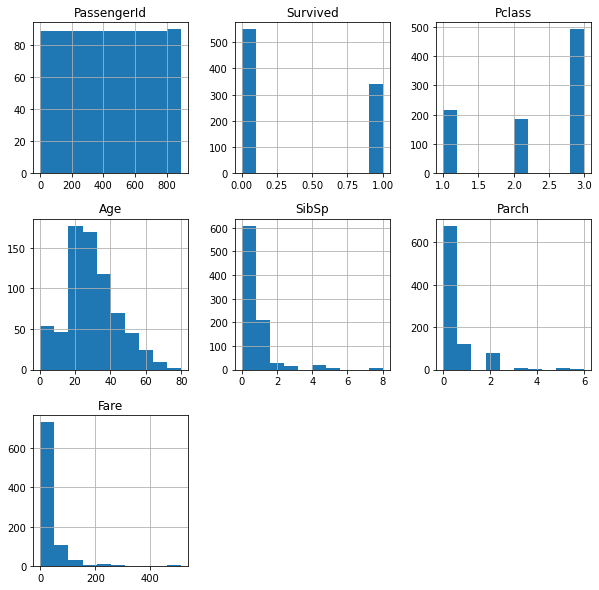

In [27]:
titanic_data.hist(figsize=(10,10))

### Procesado y transformación de datos
## <10%> ¿Qué transformaciones debería aplicar? Especifique y justifique por grupo de columnas.

Por ejemplo: columna A, B y C aplicaría transformación X porque ...

Escriba los nombres de las columna en una lista por cada grupo:

En x_train y x_test, donde estan las caracteristicas, las transformaciones que podria hacer serian las siguientes.



1)  Sex,Name,Embarked,Ticket: Aplicaria una transformacion con la clase OneHotEncoder  porque son variables categoricas y no son continuas o no siguen un orden

2) Cabin contiene datos nulos, tengo varias opciones, no seria conveniente borrar las filas porque tiene muchos valores perdidos y se podria perder mucha informacion. Lo que puedo hacer es usar SompleImputer para llenar los valores faltantes  con la media

3)Age y Fare, tambien tienen datos faltantes que puedo usar tambien el SimpleImputer

4)Pclass es una columna numerica que solo representa el tipo de clase del pasajero, son discretas, deberia usar OnehotEncoder

5)La columna PassengerId como dije es irrelevante y la voy a borrar porque no me aporta valor al analisis

<15%> A continuación escriba el código para realizar las transformaciones transformaciones

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer


In [29]:
#Elimino la columna de PassengerId porque no aporta informacion
titanic_data = titanic_data.drop('PassengerId', axis=1)
display(titanic_data.head())



,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
# Usp el imputer para reemplazar los valores faltantes
imputer = SimpleImputer(strategy='most_frequent')
titanic_data['Cabin'] = imputer.fit_transform(titanic_data[['Cabin']])
display(titanic_data.head())
print(titanic_data.isnull().sum())





,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin         0
Embarked      2
dtype: int64


In [31]:
from sklearn.preprocessing import OneHotEncoder
categorical_cols = ['Sex', 'Embarked']
encoder = OneHotEncoder()

X_train_encoded = encoder.fit_transform(titanic_data[categorical_cols])

X_train_encoded_arr=X_train_encoded.toarray().T

print("Etiquetas: ", encoder.get_feature_names_out(categorical_cols))



#Tengo que insertar las columnas en x_train
titanic_data.insert(2, "female", X_train_encoded_arr[0]) 
titanic_data.insert(3, "male", X_train_encoded_arr[1])
titanic_data.insert(10, "Embarked_C", X_train_encoded_arr[2])
titanic_data.insert(12, "Embarked_S", X_train_encoded_arr[4])
titanic_data.insert(13, "Embarked_nan", X_train_encoded_arr[5])

#Dropeo la columna embarked
titanic_data = titanic_data.drop('Embarked', axis=1)

#Borro el nombre, no es relevante

titanic_data = titanic_data.drop('Name', axis=1)

titanic_data = titanic_data.drop('Sex', axis=1)

titanic_data = titanic_data.drop('Ticket', axis=1)
titanic_data = titanic_data.drop('Cabin', axis=1)



Etiquetas:  ['Sex_female' 'Sex_male' 'Embarked_C' 'Embarked_Q' 'Embarked_S'
 'Embarked_nan']


In [32]:
titanic_data['Age']=SimpleImputer(strategy='mean').fit_transform(titanic_data[['Age']])
display(titanic_data.head())
#Verifico nulos
print(titanic_data.isnull().sum())


,Survived,Pclass,female,male,Age,SibSp,Parch,Embarked_C,Fare,Embarked_S,Embarked_nan
0,0,3,0.0,1.0,22.0,1,0,0.0,7.2500,1.0,0.0
1,1,1,1.0,0.0,38.0,1,0,1.0,71.2833,0.0,0.0
2,1,3,1.0,0.0,26.0,0,0,0.0,7.9250,1.0,0.0
3,1,1,1.0,0.0,35.0,1,0,0.0,53.1000,1.0,0.0
4,0,3,0.0,1.0,35.0,0,0,0.0,8.0500,1.0,0.0


Survived        0
Pclass          0
female          0
male            0
Age             0
SibSp           0
Parch           0
Embarked_C      0
Fare            0
Embarked_S      0
Embarked_nan    0
dtype: int64


## <5%> Separar X_train, y_train, X_test, y_test

In [33]:
X= titanic_data.drop("Survived", axis=1) # características
y = titanic_data["Survived"] #Esta es la variable objetivo

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Selección de modelo y entrenamiento
 


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
cla_log = LogisticRegression()
cla_rf = RandomForestClassifier()


<15%>Utilice validación cruzada para evaluar los modelos que se importaron. Utilice el de area bajo la curva roc mas alto.
Utilizar el metodo "cross_val_predict", tenga en cuenta que la variable, "method" para el LogisticRegression es "decision_function" y para RandomForestClassifier es "predict_proba" (ver clase o libro)

<10%>¿Por qué lo eligiria el modelo por el area bajo la curva roc?
Porque sirve para evaluar el desempeño que tiene un modelo, en este caso de clasificacion binaria, ayuda a ver la capacidad que tenemos para distinguir entre las clases positivas y negativas, sin importar el umbral que se uso. 

Por ejemplo: apartir de los verdaderos positivos, que seria en este caso al tasa para clasificar correctamente a las personas que sobrevivieron y los falsos positivos para determinar cuantas veces el modelo predice mal. Entonces si vemos la curva roc, vamos a elegir el que mayor area tenga bajo la curva porque quiere decir que tiene mas verdaderos positivos.





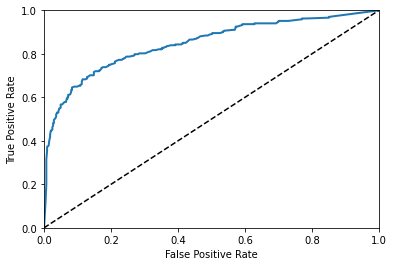

Random Forest auc score: 0.8465947290574156


In [36]:
#Random forest
from matplotlib import pyplot as plt
from sklearn.calibration import cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

# Definir una función para graficar la curva ROC
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)  # Graficar la curva ROC
    plt.plot([0, 1], [0, 1], 'k--')  # Graficar la línea diagonal que representa un clasificador aleatorio
    plt.axis([0, 1, 0, 1])  # Configurar los límites de los ejes x e y
    plt.xlabel('False Positive Rate')  # Etiqueta del eje x
    plt.ylabel('True Positive Rate')  # Etiqueta del eje y

#obtengo el score de la validacion cruzada
forest_score=cross_val_score(cla_rf, X_train, y_train, cv=3,scoring='accuracy')
#obtengo las predicciones de la validacion cruzada

forest_pred=cross_val_predict(cla_rf, X_train, y_train, cv=3,method='predict_proba')
forest_pred = forest_pred[:,1]
#print(forest_pred[forest_pred>0.5])
#Obtengo el score del area bajo la curva


forest_roc_score=roc_auc_score(y_train, forest_pred)
fpr,tpr,thresholds=roc_curve(y_train, forest_pred)

#Grafico la curva roc

# Graficar la curva ROC utilizando la función definida
plot_roc_curve(fpr, tpr)
plt.show()

print("Random Forest auc score:", forest_roc_score)

#El method se lo saco para que despues no tenga que filtrar en el vector, los mayores a 0,5

/home/juan-pablo/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/juan-pablo/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

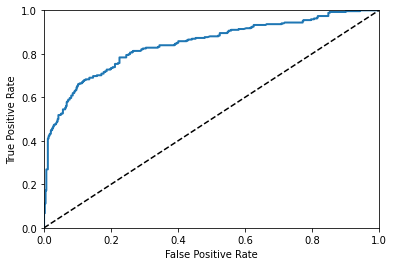

Logistic Regression auc score: 0.8439054726368159


In [37]:

#Logistic forest
from matplotlib import pyplot as plt
from sklearn.calibration import cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

# Definir una función para graficar la curva ROC
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)  # Graficar la curva ROC
    plt.plot([0, 1], [0, 1], 'k--')  # Graficar la línea diagonal que representa un clasificador aleatorio
    plt.axis([0, 1, 0, 1])  # Configurar los límites de los ejes x e y
    plt.xlabel('False Positive Rate')  # Etiqueta del eje x
    plt.ylabel('True Positive Rate')  # Etiqueta del eje y

#obtengo el score de la validacion cruzada
log_score=cross_val_score(cla_log, X_train, y_train, cv=3,scoring='accuracy')
#obtengo las predicciones de la validacion cruzada

log_pred=cross_val_predict(cla_log, X_train, y_train, cv=3,method='decision_function')
#print(log_pred[log_pred>0.5])
#Obtengo el score del area bajo la curva
log_roc_score=roc_auc_score(y_train, log_pred)
fpr,tpr,thresholds=roc_curve(y_train, log_pred)

#Grafico la curva roc

# Graficar la curva ROC utilizando la función definida
plot_roc_curve(fpr, tpr)
plt.show()

print("Logistic Regression auc score:", log_roc_score)


<15>Utilice el metodo grid search sobre el modelo elegido  
en caso de ser LogisticRegression
```
param_grid = [
{'C': [0.1, 1, 10], 'penalty': ['elasticnet'], 'l1_ratio': [0.,0.2,0.4]}
]
```
en caso de ser RandomForest utilize:
```
param_grid = [
{'n_estimators': [30, 100], 'max_features': [2, 4, 6, 8]}
]
```
¿Cuál es el sentido de hacer esto?
-El sentido de ajustar los hiperparametros, es encontrar una combinacion de los parametros que permita optimizar el rendimiento que tenemos en nuestro modelo sobre un conjunto de datos. Este ayuda a la precision, reduce y ayuda a evitar el riesgo de el overfitting, entre otros beneficios. A continuacion ajusto los hiperparametros de RandomForest y despues los de logistic regression

In [38]:
from sklearn.model_selection import GridSearchCV


param_grid_forest = [
{'n_estimators': [30, 100], 'max_features': [2, 4, 6, 8]}
]

grid_search_Forest = GridSearchCV(cla_rf, param_grid_forest,return_train_score=True, cv=5)
#Entreno el moderlo 
grid_search_Forest.fit(X_train, y_train)
#Busco los mejores hiperparametros
best_params=grid_search_Forest.best_params_
#Defino el mejo el modelo
best_model=RandomForestClassifier(**best_params,random_state=42)
#re entreno el modelo
best_model.fit(X_train, y_train)
accuracy=best_model.score(X_test, y_test)
print("Accuracy con Random forest:", accuracy)

#A modo de comparacion, con el mejor modelo, le aplico la validacion cruzada
forest_best_score=cross_val_score(best_model, X_train, y_train, cv=4,scoring='accuracy')
print("Random Forest best score:", forest_best_score)

Accuracy con Random forest: 0.7821229050279329
Random Forest best score: [0.78089888 0.79213483 0.79775281 0.80898876]


In [39]:
param_grid_logistic = [
{'C': [0.1, 1, 10], }
]

grid_search_logistic = GridSearchCV(cla_log, param_grid_logistic,return_train_score=True, cv=5)
#Entreno el moderlo 
grid_search_logistic.fit(X_train, y_train)
#Busco los mejores hiperparametros
best_params=grid_search_logistic.best_params_
#Defino el mejo el modelo
best_model=LogisticRegression(**best_params,random_state=42)
#re entreno el modelo
best_model.fit(X_train, y_train)
accuracy=best_model.score(X_test, y_test)
print("------------------------------------------------------------------------------------\n")
print("Accuracy con Losistic:", accuracy)

#A modo de comparacion, con el mejor modelo, le aplico la validacion cruzada
logistic_best_scores=cross_val_score(best_model, X_train, y_train, cv=4,scoring='accuracy')
print("Logistic best score:", logistic_best_scores)

print("------------------------------------------------------------------------------------\n")

/home/juan-pablo/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/juan-pablo/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

------------------------------------------------------------------------------------

Accuracy con Losistic: 0.8100558659217877
Logistic best score: [0.79213483 0.86516854 0.74719101 0.79213483]
------------------------------------------------------------------------------------



/home/juan-pablo/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/juan-pablo/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

<5%>Imprima el valor de accuracy, recall, precision, f1 y auc_roc, en las regiones de validación

In [40]:
#Primero para random forest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
pred_forest_filter=(forest_pred>0.5)


forest_accuracy=accuracy_score(y_train, pred_forest_filter)
forest_recall=recall_score(y_train, pred_forest_filter)
forest_f1=f1_score(y_train, pred_forest_filter)
forest_precision=precision_score(y_train, pred_forest_filter)
print("Random Forest accuracy: ",forest_accuracy)
print("Random Forest recall: ",forest_recall)
print("Random Forest f1: ",forest_f1)
print("Random Forest precision: ",forest_precision)
#curva roc
forest_auc=forest_roc_score
print("Forest AUC: ",forest_auc)

Random Forest accuracy:  0.8019662921348315
Random Forest recall:  0.7014925373134329
Random Forest f1:  0.7272727272727273
Random Forest precision:  0.7550200803212851
Forest AUC:  0.8465947290574156


In [41]:
#Para logistic
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

pred_log_filter=(log_pred>0)

log_accuracy=accuracy_score(y_train, pred_log_filter)
log_recall=recall_score(y_train, pred_log_filter)
log_f1=f1_score(y_train, pred_log_filter)
log_precision=precision_score(y_train, pred_log_filter)
print("Logistic accuracy: ",log_accuracy)
print("Logistic recall: ",log_recall)
print("Logistic f1: ",log_f1)
print("Logistic precision: ",log_precision)
#curva roc
log_auc=log_roc_score
print("Logistic AUC: ",log_auc)



Logistic accuracy:  0.800561797752809
Logistic recall:  0.6828358208955224
Logistic f1:  0.720472440944882
Logistic precision:  0.7625
Logistic AUC:  0.8439054726368159


<5%>Imprima el valor de accuracy, recall, precision, f1 y auc_roc, en las regiones de test, 
¿Los números son parecido a lo obtenido en las regiones de validación? ¿A qué puede deberse?
Si son parecidos, pero en la region de prueba son un poco mas grandes que en validacion, puede ser que se de por aleatoriedad en la seleccion de datos en la region o que hayan diferencias en las distribuciones de datos entre las regiones que epueda ser que influyan. Tambien al ser parecido indica que el modelo generaliza bien

In [42]:
y_test_pred_log=cross_val_predict(cla_log, X_test, y_test, cv=4)
y_test_pred_forest=cross_val_predict(cla_rf, X_test, y_test, cv=4)

/home/juan-pablo/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/juan-pablo/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

In [43]:
#Primero para random forest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


forest_accuracy=accuracy_score(y_test, y_test_pred_forest)
forest_recall=recall_score(y_test, y_test_pred_forest)
forest_f1=f1_score(y_test, y_test_pred_forest)
forest_precision=precision_score(y_test, y_test_pred_forest)
print("Random Forest accuracy: ",forest_accuracy)
print("Random Forest recall: ",forest_recall)
print("Random Forest f1: ",forest_f1)
print("Random precision: ",log_precision)
#curva roc
forest_auc=forest_roc_score
print("Forest AUC: ",forest_auc)


print("------------------------------------------------------------------------------------\n")
#Para logistic
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


log_accuracy=accuracy_score(y_test, y_test_pred_log)
log_recall=recall_score(y_test, y_test_pred_log)
log_f1=f1_score(y_test, y_test_pred_log)
log_precision=precision_score(y_test, y_test_pred_log)
print("Logistic accuracy: ",log_accuracy)
print("Logistic recall: ",log_recall)
print("Logistic f1: ",log_f1)
print("Logistic precision: ",log_precision)
#curva roc
log_auc=log_roc_score
print("Logistic AUC: ",log_auc)

Random Forest accuracy:  0.8044692737430168
Random Forest recall:  0.7972972972972973
Random Forest f1:  0.7712418300653594
Random precision:  0.7625
Forest AUC:  0.8465947290574156
------------------------------------------------------------------------------------

Logistic accuracy:  0.8156424581005587
Logistic recall:  0.7432432432432432
Logistic f1:  0.7692307692307693
Logistic precision:  0.7971014492753623
Logistic AUC:  0.8439054726368159


-----------------------------------------------------------------


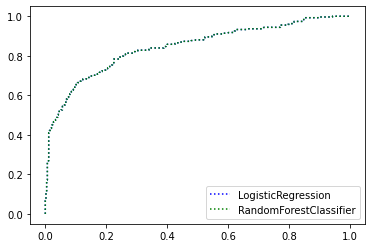

In [44]:
print("-----------------------------------------------------------------")
# Graficar la curva ROC para comparar
plt.plot(fpr, tpr , "b:", label="LogisticRegression")
plt.plot(fpr, tpr, "g:", label="RandomForestClassifier")
plt.legend(loc="lower right")
plt.show()